<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_9_ASSIGNMENT_9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

1. (1 ponto) Design a multilayer ANN architecture to identify the hand-written digits using the
Keras deep learning library. Consider the MNIST data set

2. (1 ponto) Calculate the accuracy with training and testing data

3. (1 ponto) Also, change the architecture by tuning no. of hidden layers, no. of hidden neurons
and activation functions in hidden layer. Identify best architecture in terms of testing accuracy
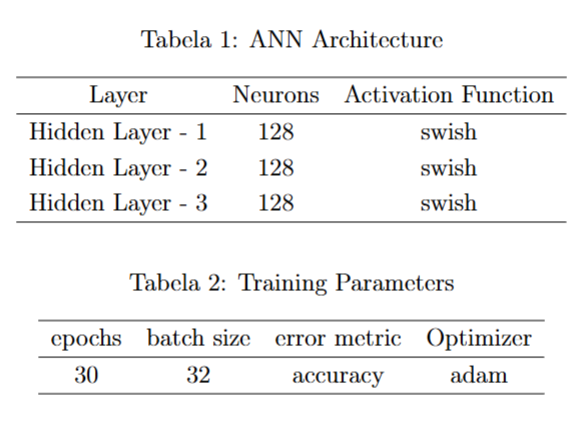

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def mnist_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='swish'),
        Dense(128, activation='swish'),
        Dense(128, activation='swish'),
        Dense(10, activation='softmax')
    ])
    return model

model = mnist_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

model.save("mnist_model.h5")

loaded_model = tf.keras.models.load_model("mnist_model.h5")
new_data = tf.random.uniform((1, 28, 28))
predicted_result = loaded_model.predict(new_data)
print("Predicted Digit:", tf.argmax(predicted_result, axis=1).numpy()[0])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8787 - loss: 0.4093 - val_accuracy: 0.9635 - val_loss: 0.1193
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9679 - loss: 0.1021 - val_accuracy: 0.9621 - val_loss: 0.1159
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9793 - loss: 0.0675 - val_accuracy: 0.9736 - val_loss: 0.0831
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9848 - loss: 0.0472 - val_accuracy: 0.9778 - val_loss: 0.0779
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9882 - loss: 0.0359 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9767 - val_loss: 0.0789
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9920 - loss: 0.0249 - val_accuracy: 0.9781 - val_loss: 0.0833
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.020

Train Accuracy: 0.9971500039100647
Test Accuracy: 0.9771999716758728
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Digit: 5
